In [1]:
import os, sys

# Get the absolute path of the notebook's directory
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add the parent directory to sys.path so we can import modules
sys.path.append(parent_dir)

# Verify the path
print(f"Added to sys.path: {parent_dir}")

# Add it to sys.path
sys.path.append(parent_dir)

from FlashOperation.Refrig2DrumHeatExConstrDummy import Refrig2DrumConstraintHeatExConstDummy
from module import *
import pandas as pd

Added to sys.path: /Users/panwapromtep/Library/CloudStorage/OneDrive-JohnsHopkins/Process Design/Aspen


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pickle
import os

# Define the file path for saving/loading the data
data_file = "flash_simulation_data_sim_new.pkl"

# Define parameter ranges
flash_1_range_sim = np.linspace(-10, 10, 10)
flash_2_range_sim = np.linspace(-10, 10, 10)


print("Generating new data...")
assSim = Refrig2DrumConstraintHeatExConstDummy(AspenFile="../FlashOperation/FlashOperation_HeatExchanger.bkp",
                                        wdpath="../FlashOperation",
                                        visibility=False,
                                        Penalty=1e3)

data_sim = []
for flash_1 in flash_1_range_sim:
    for flash_2 in flash_2_range_sim:
        x_unflat = assSim.unflatten_params([float(flash_1), float(flash_2)])
        data_sim.append([flash_1, flash_2, assSim.run_obj(x_unflat)])



data_sim = np.array(data_sim)
print(data_sim)

Generating new data...
⚠️ Dummy Mode: Skipping Aspen simulation initialization.
[[-10.         -10.         200.        ]
 [-10.          -7.77777778 160.49382716]
 [-10.          -5.55555556 130.86419753]
 [-10.          -3.33333333 111.11111111]
 [-10.          -1.11111111 101.2345679 ]
 [-10.           1.11111111 101.2345679 ]
 [-10.           3.33333333 111.11111111]
 [-10.           5.55555556 130.86419753]
 [-10.           7.77777778 160.49382716]
 [-10.          10.         200.        ]
 [ -7.77777778 -10.         160.49382716]
 [ -7.77777778  -7.77777778 120.98765432]
 [ -7.77777778  -5.55555556  91.35802469]
 [ -7.77777778  -3.33333333  71.60493827]
 [ -7.77777778  -1.11111111  61.72839506]
 [ -7.77777778   1.11111111  61.72839506]
 [ -7.77777778   3.33333333  71.60493827]
 [ -7.77777778   5.55555556  91.35802469]
 [ -7.77777778   7.77777778 120.98765432]
 [ -7.77777778  10.         160.49382716]
 [ -5.55555556 -10.         130.86419753]
 [ -5.55555556  -7.77777778  91.358024

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

def plot_contour_surface(data, x_label, y_label, z_label, x_point=None, gradient=None):
    """
    Generate a high-resolution heatmap with contour lines based on the given 3D data.
    Optionally overlays a single point (x_point) and its gradient vector on the plot.
    """
    # Convert data to numpy array for easier manipulation
    data = np.array(data)
    x, y, z = data[:, 0], data[:, 1], data[:, 2]

    # Generate a finer grid for interpolation
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), 200),
        np.linspace(y.min(), y.max(), 200)
    )
    
    # Interpolate z values using cubic interpolation
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

    # Create the heatmap and add contour lines
    plt.figure(figsize=(8, 6))
    plt.imshow(grid_z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(label=z_label)

    contour_levels = np.linspace(np.nanmin(grid_z), np.nanmax(grid_z), 15)
    plt.contour(grid_x, grid_y, grid_z, levels=contour_levels, colors='black', linewidths=0.8)
    
    # Plot the true optimal point
    true_optimal = np.array([-1.11, -0.5])
    plt.scatter(true_optimal[0], true_optimal[1], color='blue', zorder=5)
    plt.text(true_optimal[0], true_optimal[1], 'True Optimal', color='white', fontsize=10, ha='right')
    
    # Plot the local minimum points
    local_minima = [np.array([0.84, -0.5]), np.array([0.27, -0.5])]
    for lm in local_minima:
        plt.scatter(lm[0], lm[1], color='orange', zorder=5)
        plt.text(lm[0], lm[1], 'Local Min', color='orange', fontsize=10, ha='right')
    
    # Overlay the x point and gradient arrow if provided
    if x_point is not None and gradient is not None:
        # Convert the x and grad lists to NumPy arrays with float type
        # x_point = np.asarray(x, dtype=float)   # x is x_init.tolist() passed in
        gradient = np.asarray(gradient, dtype=float) # grad is grad_pred.tolist() passed in
        # x_point and gradient should be 1D arrays with 2 numbers each
        plt.quiver(
            x_point[0], x_point[1],
            gradient[0], gradient[1],
            color='red', angles='xy', scale_units='xy', scale=0.1, zorder=10
        )
        plt.scatter(x_point[0], x_point[1], color='red', zorder=10)  # Mark the point
        plt.text(x_point[0], x_point[1], 'x_point', color='red', fontsize=10, ha='left')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


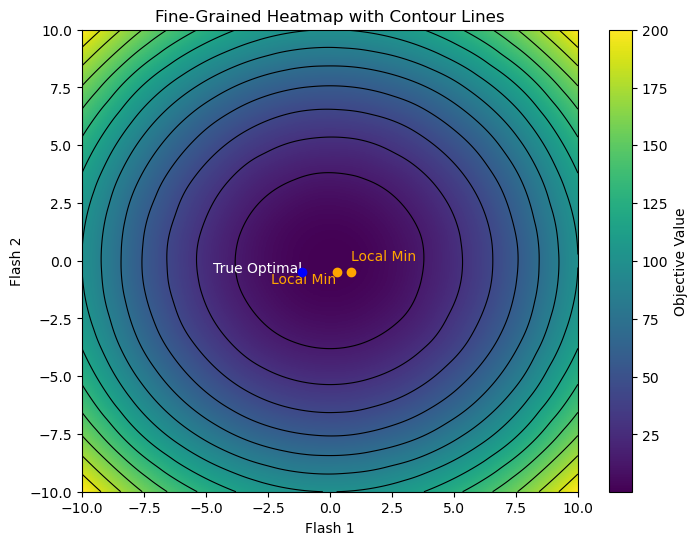

In [5]:
# # Generate synthetic data based on the function f(x, y) = (x^2 - 1)^2 + y^2
# x_samples = np.linspace(-2, 2, 50)  # Sparse grid
# y_samples = np.linspace(-2, 2, 50)
# X_data, Y_data = np.meshgrid(x_samples, y_samples)
# Z_data = (X_data**2 - 1)**2 + Y_data**2  # Function values

# data = np.column_stack([X_data.flatten(), Y_data.flatten(), Z_data.flatten()])
# Flatten arrays to match the required format
from scipy.interpolate import griddata

# Extract columns
x, y, z = data_sim[:, 0], data_sim[:, 1], data_sim[:, 2]

# Generate a finer grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 200),  # Increased resolution
    np.linspace(y.min(), y.max(), 200)
)

# Interpolate z values using cubic interpolation
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Create a high-resolution heatmap with contour lines
plt.figure(figsize=(8, 6))
plt.imshow(grid_z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Objective Value')

# Add contour lines
contour_levels = np.linspace(grid_z.min(), grid_z.max(), 15)  # Define contour levels
plt.contour(grid_x, grid_y, grid_z, levels=contour_levels, colors='black', linewidths=0.8)

# Add labels and title
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')
plt.title('Fine-Grained Heatmap with Contour Lines')

# Plot the true optimal point
true_optimal = np.array([-1.11, -0.5])
plt.scatter(true_optimal[0], true_optimal[1], color='blue', zorder=5)
plt.text(true_optimal[0], true_optimal[1], 'True Optimal', color='white', fontsize=10, ha='right')

# Plot the local minimum points
local_minima = [np.array([0.84, -0.5]), np.array([0.27, -0.5])]

plt.scatter(local_minima[0][0], local_minima[0][1], color='orange', zorder=5)
plt.text(local_minima[0][0], local_minima[0][1] + 0.5, 'Local Min', color='orange', fontsize=10, ha='left')

plt.scatter(local_minima[1][0], local_minima[1][1], color='orange', zorder=5)
plt.text(local_minima[1][0], local_minima[1][1] - 0.5, 'Local Min', color='orange', fontsize=10, ha='right')

# Show the plot
plt.show()


In [6]:
print(len(data_sim))
scaler = TorchMinMaxScaler((-1, 1), 
                           max_vals=[10.0, 10.0],
                           min_vals=[-10.0, -10.0],
                           min_y=0,
                           max_y = 10**2 + 10**2,
                           scale_y=True)
#scale data_sim 
data_sim_xscaled, data_sim_yscaled = scaler.transform(data_sim[:, :2], data_sim[:, 2])

#recombine the data
data_sim_scaled = np.column_stack([data_sim_xscaled, data_sim_yscaled])

# **Initialize Model & Datasets**
old_dataset = OldDataSet(data_sim_scaled, k=3)
new_dataset = NewDataSet(k=3)
model = MLP(2, [20, 20,20], 1)

print(data_sim[15])
print(data_sim_scaled[15])


100
[-7.77777778  1.11111111 61.72839506]
[-0.7777778   0.11111104 -0.38271606]


In [7]:
# train model on just old dataset
trained1 = train_model(
    model = model,
    old_dataset = old_dataset,
    batch_size_old=64,
    epochs = 400,
    lambda_mse=0,
    print_loss=True,
    lr = 1e-3
)

device cpu
⚠️ No new data available, training only on old dataset.
Epoch 0: Total Loss=0.1338
Epoch 10: Total Loss=0.0889
Epoch 20: Total Loss=0.0570
Epoch 30: Total Loss=0.0250
Epoch 40: Total Loss=0.0067
Epoch 50: Total Loss=0.0029
Epoch 60: Total Loss=0.0014
Epoch 70: Total Loss=0.0010
Epoch 80: Total Loss=0.0007
Epoch 90: Total Loss=0.0005
Epoch 100: Total Loss=0.0004
Epoch 110: Total Loss=0.0003
Epoch 120: Total Loss=0.0003
Epoch 130: Total Loss=0.0002
Epoch 140: Total Loss=0.0002
Epoch 150: Total Loss=0.0002
Epoch 160: Total Loss=0.0002
Epoch 170: Total Loss=0.0002
Epoch 180: Total Loss=0.0002
Epoch 190: Total Loss=0.0002
Epoch 200: Total Loss=0.0002
Epoch 210: Total Loss=0.0001
Epoch 220: Total Loss=0.0002
Epoch 230: Total Loss=0.0001
Epoch 240: Total Loss=0.0001
Epoch 250: Total Loss=0.0001
Epoch 260: Total Loss=0.0001
Epoch 270: Total Loss=0.0001
Epoch 280: Total Loss=0.0001
Epoch 290: Total Loss=0.0001
Epoch 300: Total Loss=0.0001
Epoch 310: Total Loss=0.0001
Epoch 320: Total

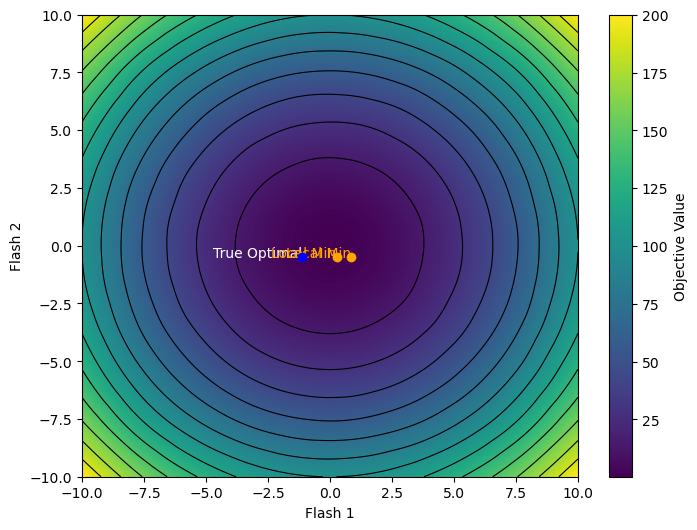

In [ ]:
#visualize the model

